In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
rest_data = pd.read_csv('restaurant_data.csv')
rest_data.head()

Name  Location   Cuisine  Rating  Seating Capacity  \
0  Restaurant 0     Rural  Japanese     4.0                38   
1  Restaurant 1  Downtown   Mexican     3.2                76   
2  Restaurant 2     Rural   Italian     4.7                48   
3  Restaurant 3     Rural   Italian     4.4                34   
4  Restaurant 4  Downtown  Japanese     4.9                88   

   Average Meal Price  Marketing Budget  Social Media Followers  \
0               73.98              2224                   23406   
1               28.11              4416                   42741   
2               48.29              2796                   37285   
3               51.55              1167                   15214   
4               75.98              3639                   40171   

   Chef Experience Years  Number of Reviews  Avg Review Length  \
0                     13                185         161.924906   
1                      8                533         148.759717   
2                     18                853          56.849189   
3                     13                 82         205.433265   
4                      9                 78         241.681584   

   Ambience Score  Service Quality Score Parking Availability  \
0             1.3                    7.0                  Yes   
1             2.6                    3.4                  Yes   
2             5.3                    6.7                   No   
3             4.6                    2.8                  Yes   
4             8.6                    2.1                   No   

   Weekend Reservations  Weekday Reservations     Revenue  
0                    13                     4   638945.52  
1                    48                     6   490207.83  
2                    27                    14   541368.62  
3                     9                    17   404556.80  
4                    37                    26  1491046.35

# Understanding The data.
This includes getting to understand the number of rows and columns, mean and median for each column in the data, and finding the sum of the null values in the data.

In [4]:
rest_data.shape

(8368, 17)

In [5]:
rest_data.describe()

Rating  Seating Capacity  Average Meal Price  Marketing Budget  \
count  8368.000000       8368.000000         8368.000000       8368.000000   
mean      4.008258         60.212835           47.896659       3218.254900   
std       0.581474         17.399488           14.336767       1824.896053   
min       3.000000         30.000000           25.000000        604.000000   
25%       3.500000         45.000000           35.490000       1889.000000   
50%       4.000000         60.000000           45.535000       2846.500000   
75%       4.500000         75.000000           60.300000       4008.500000   
max       5.000000         90.000000           76.000000       9978.000000   

       Social Media Followers  Chef Experience Years  Number of Reviews  \
count             8368.000000            8368.000000        8368.000000   
mean             36190.621773              10.051984         523.010397   
std              18630.153330               5.516606         277.215127   
min               5277.000000               1.000000          50.000000   
25%              22592.500000               5.000000         277.000000   
50%              32518.500000              10.000000         528.000000   
75%              44566.250000              15.000000         764.250000   
max             103777.000000              19.000000         999.000000   

       Avg Review Length  Ambience Score  Service Quality Score  \
count        8368.000000     8368.000000            8368.000000   
mean          174.769974        5.521283               5.508772   
std            71.998060        2.575442               2.586552   
min            50.011717        1.000000               1.000000   
25%           113.311102        3.300000               3.200000   
50%           173.910079        5.500000               5.600000   
75%           237.406885        7.800000               7.800000   
max           299.984924       10.000000              10.000000   

       Weekend Reservations  Weekday Reservations       Revenue  
count           8368.000000           8368.000000  8.368000e+03  
mean              29.491754             29.235301  6.560706e+05  
std               20.025415             20.004277  2.674137e+05  
min                0.000000              0.000000  1.847085e+05  
25%               13.000000             13.000000  4.546514e+05  
50%               27.000000             26.000000  6.042421e+05  
75%               43.000000             43.000000  8.130942e+05  
max               88.000000             88.000000  1.531868e+06

In [6]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [7]:
rest_data.isnull().sum()

Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64

# Data cleaning.
Removing the unnecessary data required for analysis.

In [8]:
rest_data.drop(['Name'],axis=1, inplace=True)

# Data Visualizaton.

Show the correlation between all the data

<AxesSubplot:>

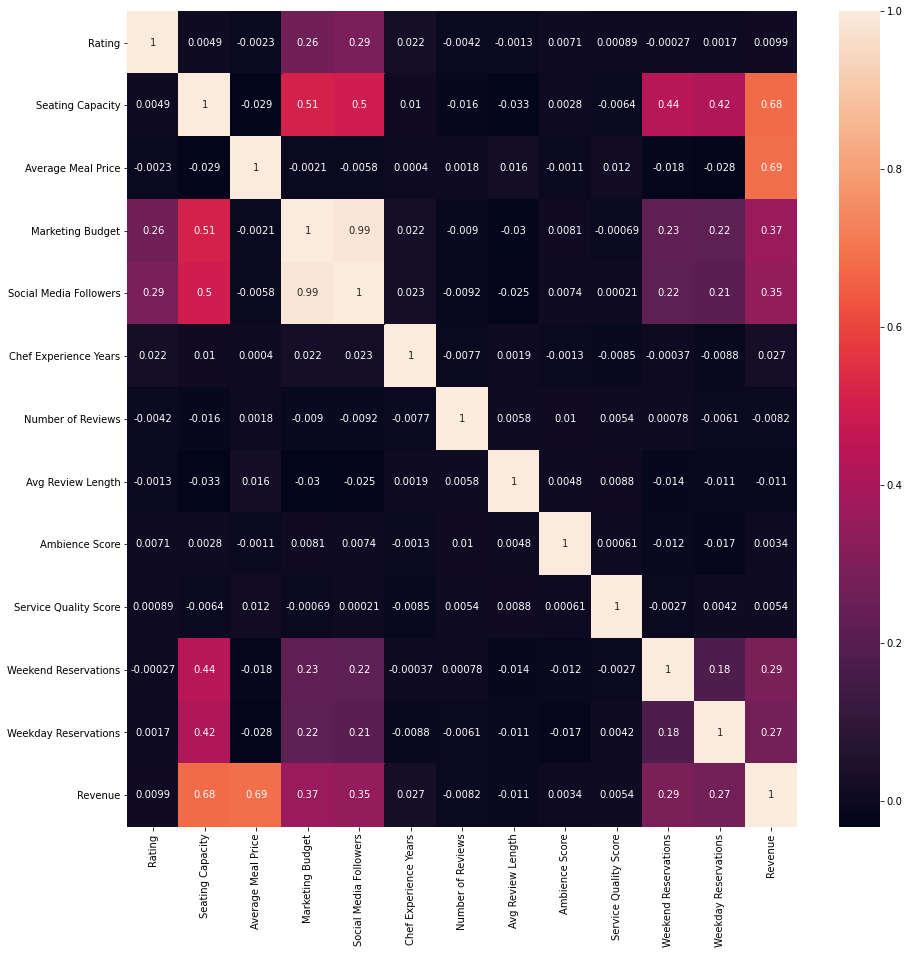

In [9]:
plt.figure(figsize=(15, 15))
data_corr = rest_data.corr()

sns.heatmap(data_corr, annot=True)

From the above chart, there is great correlation between Seating and revenue, and also meal price and revenue.
There is also a great relation between marketing budget and social media followers.

Sum of all hotels according to location

<AxesSubplot:xlabel='count', ylabel='Location'>

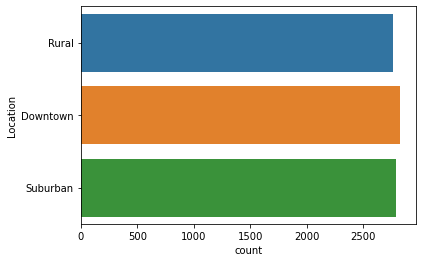

In [10]:
sns.countplot(y='Location', data=rest_data)

From the chart above, there is almost equal number of resturants in Rural, Downtown and Suburban

# Sum of hotels and their cuisins

<AxesSubplot:xlabel='count', ylabel='Cuisine'>

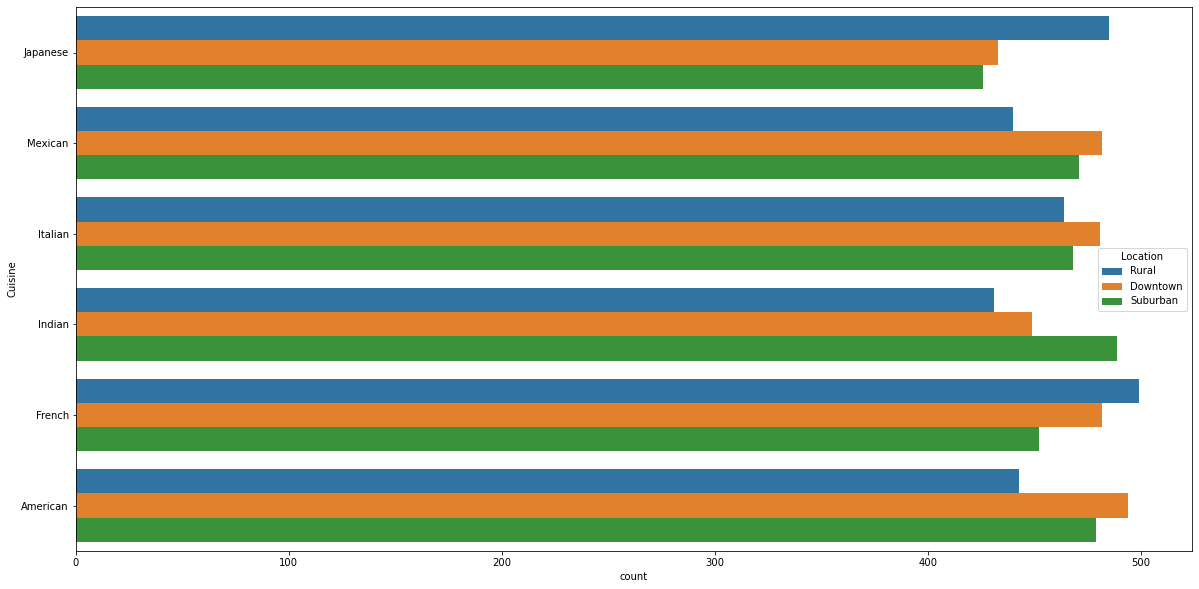

In [11]:
plt.figure(figsize=(20, 10))
sns.countplot(data=rest_data, y='Cuisine', hue='Location')

# Average revenue for each location

<AxesSubplot:xlabel='Location', ylabel='Revenue'>

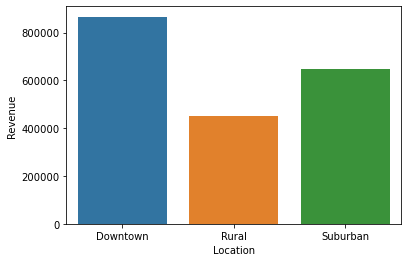

In [12]:
# plt.figure(figsize=(15, 10))
average_revenue = rest_data.groupby('Location')['Revenue'].mean()
sns.barplot(x=average_revenue.index, y=average_revenue)

# Average revenue for each cuisine

<AxesSubplot:xlabel='Cuisine', ylabel='Revenue'>

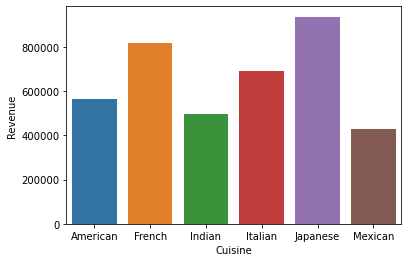

In [13]:
average_cuisine_revenue = rest_data.groupby('Cuisine')['Revenue'].mean()
sns.barplot(x=average_cuisine_revenue.index, y=average_cuisine_revenue)

# Average Reservations

<AxesSubplot:xlabel='Location', ylabel='Weekend Reservations'>

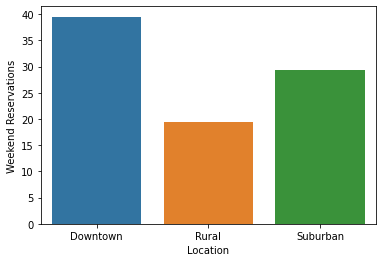

In [14]:
average_weekend = rest_data.groupby('Location')['Weekend Reservations'].mean()
sns.barplot(x=average_weekend.index, y=average_weekend)

<AxesSubplot:xlabel='Location', ylabel='Weekday Reservations'>

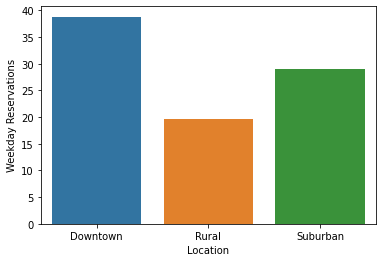

In [15]:
average_weekdays = rest_data.groupby('Location')['Weekday Reservations'].mean()
sns.barplot(x=average_weekdays.index, y=average_weekdays)

<AxesSubplot:xlabel='Parking Availability', ylabel='count'>

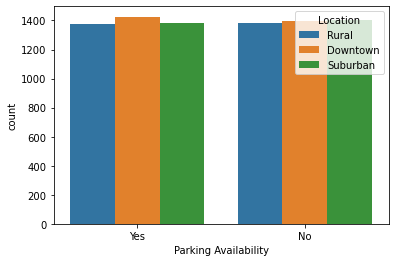

In [16]:
sns.countplot(x='Parking Availability', data=rest_data, hue='Location')

<AxesSubplot:xlabel='Revenue', ylabel='Count'>

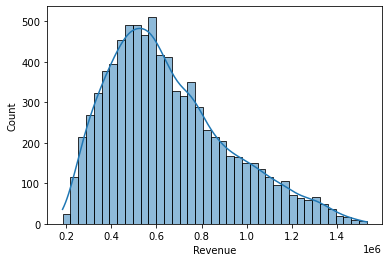

In [18]:
sns.histplot(x='Revenue', data=rest_data, kde=True)

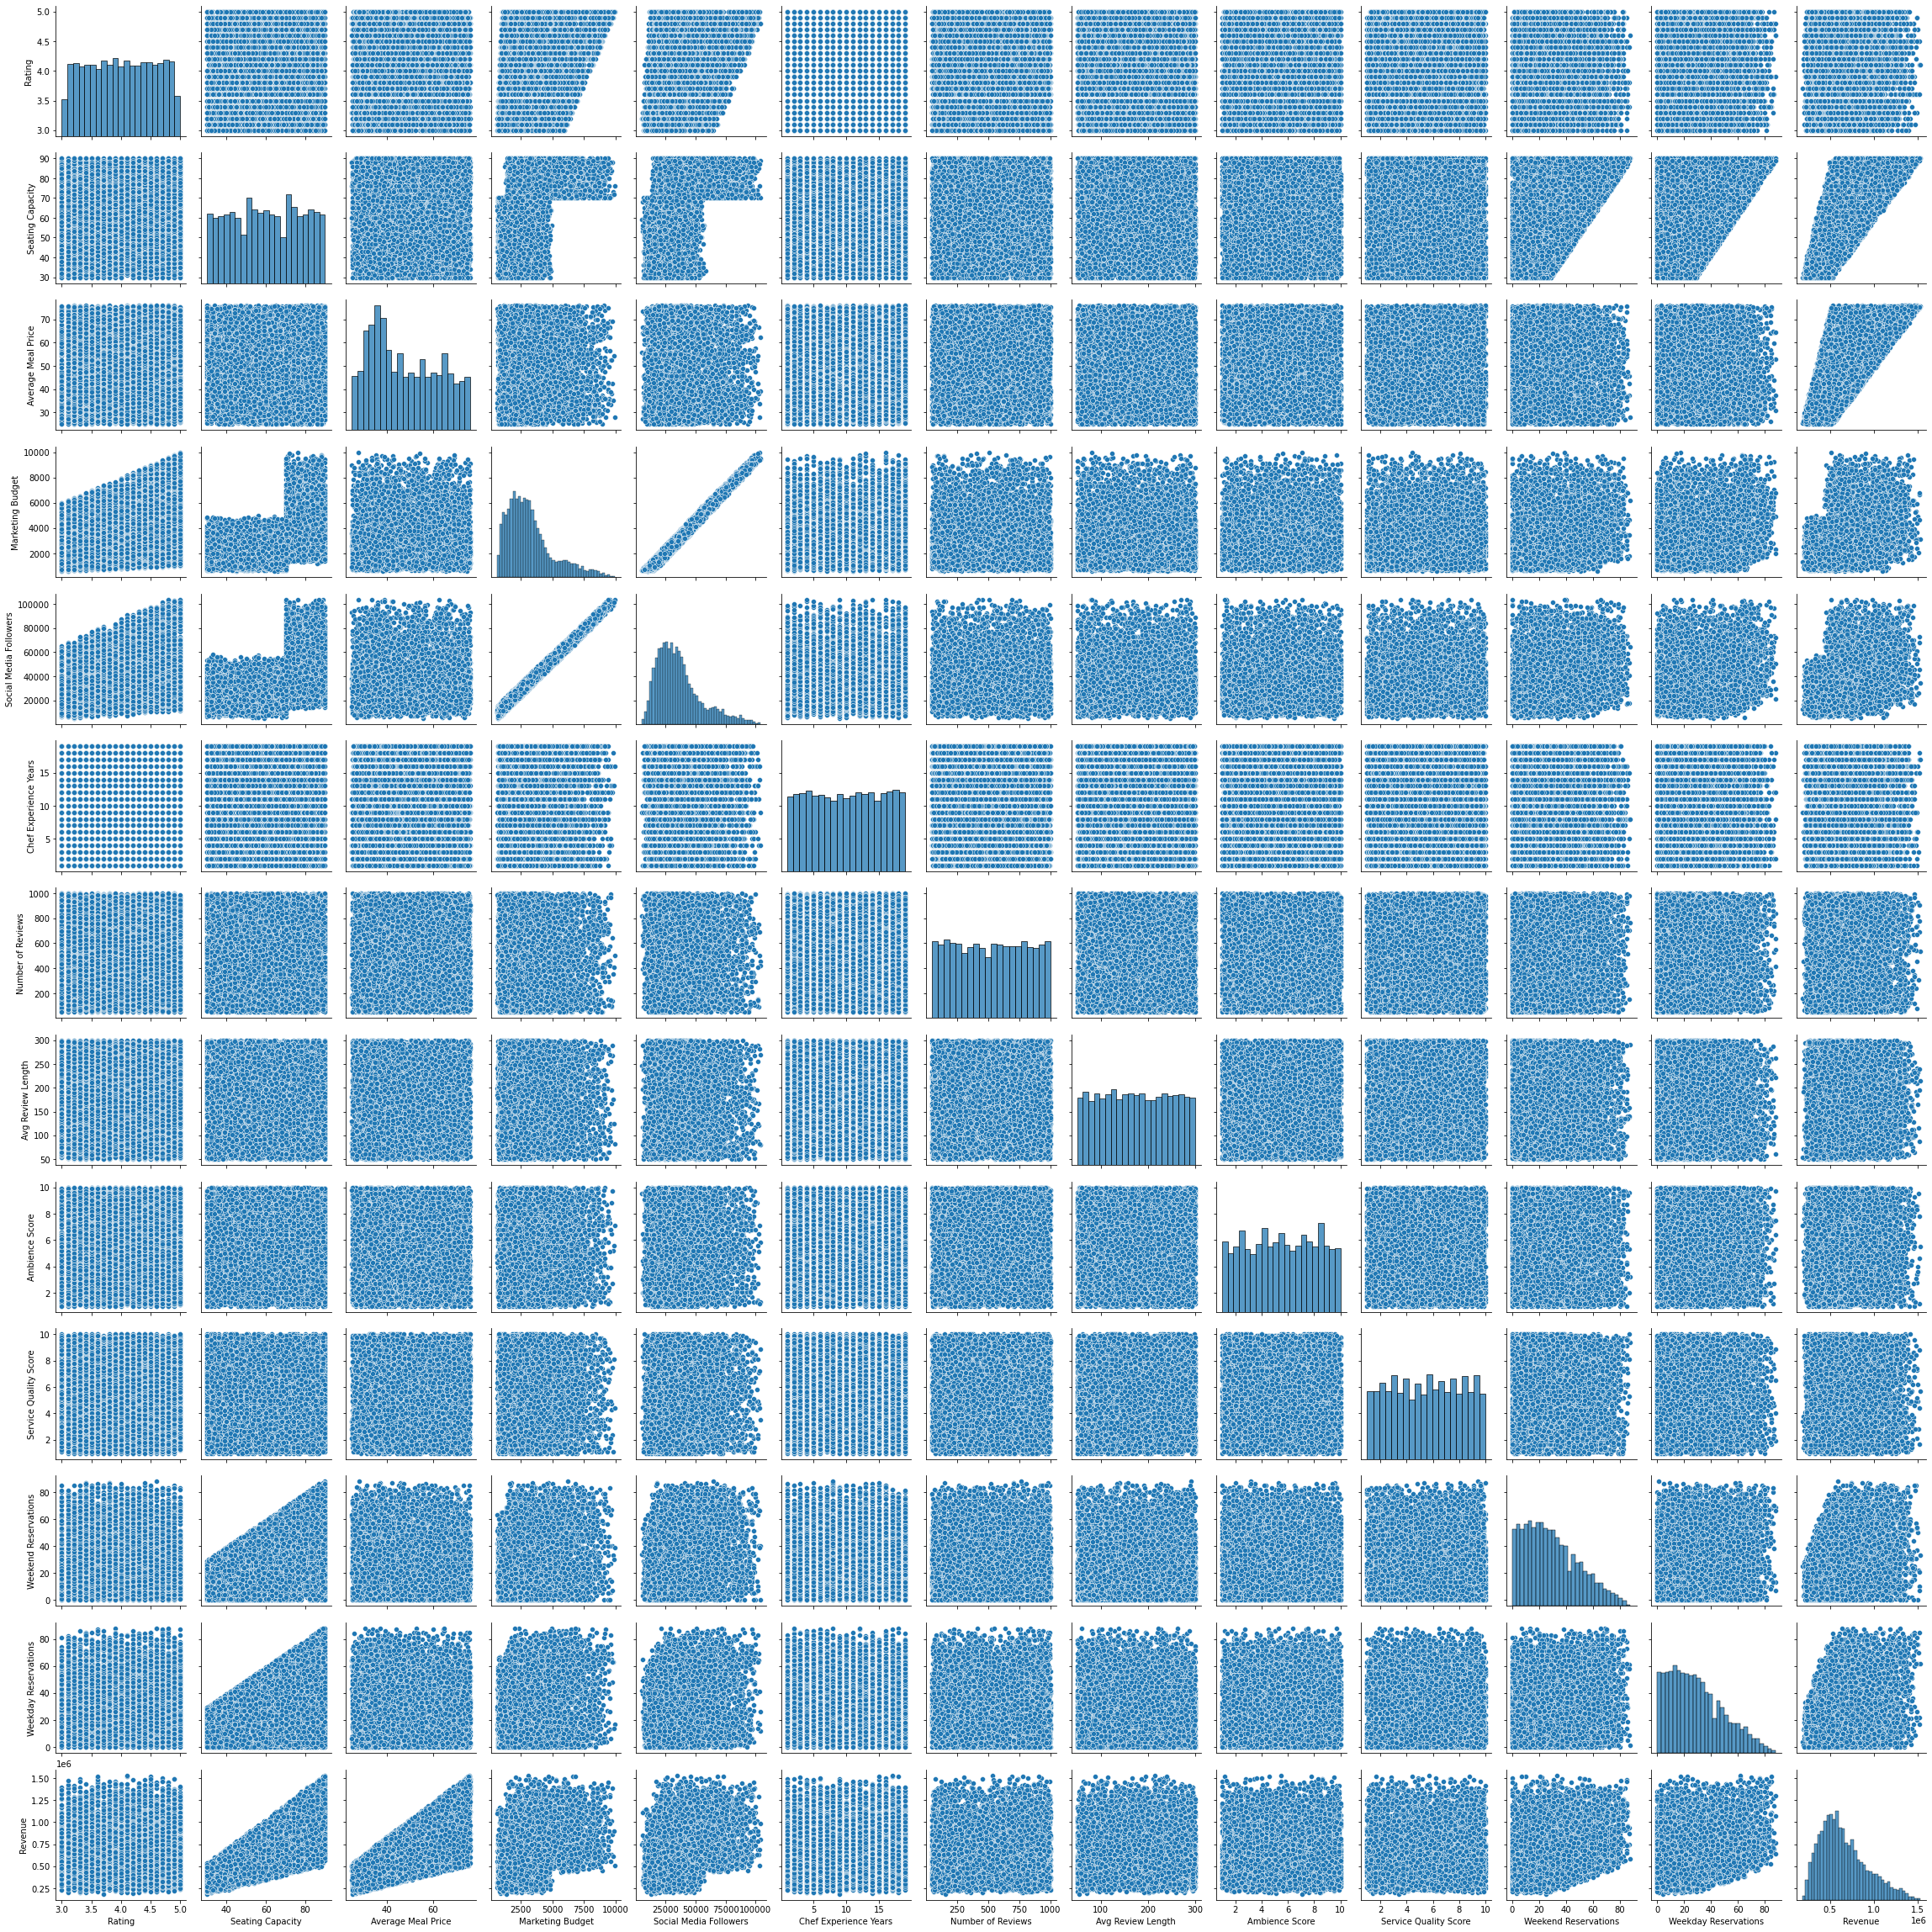

In [15]:
sns.pairplot(rest_data)

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [25]:
encoder = LabelEncoder()
for column in rest_data.columns:
    rest_data[column] = encoder.fit_transform(rest_data[column])
    
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Location                8368 non-null   int64
 1   Cuisine                 8368 non-null   int64
 2   Rating                  8368 non-null   int64
 3   Seating Capacity        8368 non-null   int64
 4   Average Meal Price      8368 non-null   int64
 5   Marketing Budget        8368 non-null   int64
 6   Social Media Followers  8368 non-null   int64
 7   Chef Experience Years   8368 non-null   int64
 8   Number of Reviews       8368 non-null   int64
 9   Avg Review Length       8368 non-null   int64
 10  Ambience Score          8368 non-null   int64
 11  Service Quality Score   8368 non-null   int64
 12  Parking Availability    8368 non-null   int64
 13  Weekend Reservations    8368 non-null   int64
 14  Weekday Reservations    8368 non-null   int64
 15  Revenue              

In [26]:
rest_data.drop(['Location'], axis=1)

Cuisine  Rating  Seating Capacity  Average Meal Price  Marketing Budget  \
0           4      10                 8                3821              1274   
1           5       2                46                 220              3022   
2           3      17                18                1942              1775   
3           3      14                 4                2175               361   
4           4      19                58                3963              2495   
...       ...     ...               ...                 ...               ...   
8363        2       4                24                 809               313   
8364        2       7                19                1005              1063   
8365        3      17                58                1835              3637   
8366        0       1                 1                1642                22   
8367        4      10                 3                3617              1077   

      Social Media Followers  Chef Experience Years  Number of Reviews  \
0                       2093                     12                135   
1                       5538                      7                483   
2                       4717                     17                802   
3                        630                     12                 32   
4                       5203                      8                 28   
...                      ...                    ...                ...   
8363                     192                     10                330   
8364                    1524                      8                662   
8365                    6964                      5                386   
8366                      17                      0                678   
8367                    2267                      7                147   

      Avg Review Length  Ambience Score  Service Quality Score  \
0                  3740               3                     60   
1                  3296              16                     24   
2                   211              43                     57   
3                  5219              36                     18   
4                  6422              76                     11   
...                 ...             ...                    ...   
8363               6841              85                     40   
8364               4238              17                     16   
8365               5773              38                      7   
8366               4328              51                     11   
8367               3413              49                     65   

      Parking Availability  Weekend Reservations  Weekday Reservations  \
0                        1                    13                     4   
1                        1                    48                     6   
2                        0                    27                    14   
3                        1                     9                    17   
4                        0                    37                    26   
...                    ...                   ...                   ...   
8363                     1                    37                     0   
8364                     0                    37                    21   
8365                     1                    83                    21   
8366                     0                     6                    21   
8367                     1                     5                    12   

      Revenue  
0        4611  
1        2578  
2        3295  
3        1460  
4        8358  
...       ...  
8363     1819  
8364     1573  
8365     6974  
8366      530  
8367     3201  

[8368 rows x 15 columns]

In [27]:

X = rest_data.drop(['Revenue'], axis=1)
y = rest_data['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(0.2), random_state=(42))
model = RandomForestRegressor()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print(predicted)
# score = model.score(X_test, y_test)
# mse = mean_squared_error(y_test, predicted)
# print("Mean Squared Error: ",mse)
# print("Model Score: ",score)

[2504.15  396.3  2097.91 ... 6324.93 7893.4  7027.18]
